In [1]:
# 1. Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pd.set_option('max_columns', None)
pd.set_option('max_rows',None)

In [3]:
# 2. Reading the data
cancer=load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer_df=pd.DataFrame(np.c_[cancer['data'], cancer['target']],columns=np.append(cancer['feature_names'],'target'))

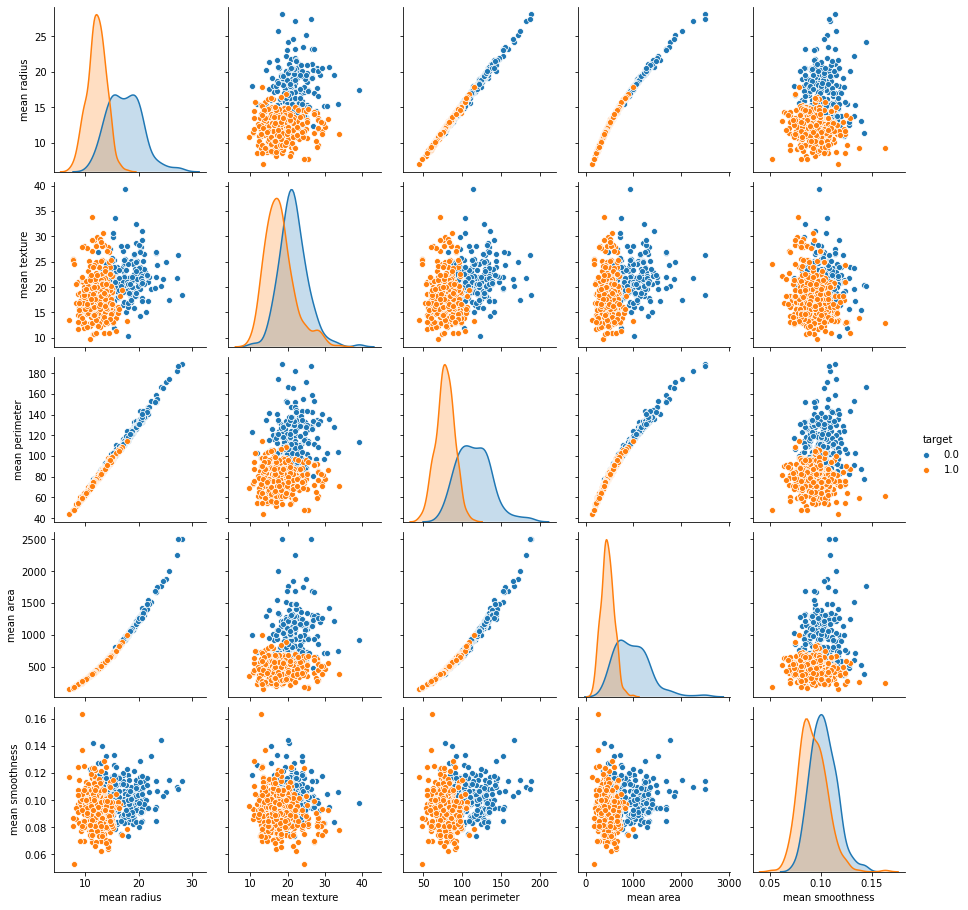

In [7]:
# 3.Understanding the data
sns.pairplot(cancer_df, hue='target',vars=['mean radius', 'mean texture','mean perimeter','mean area',
                                          'mean smoothness'])

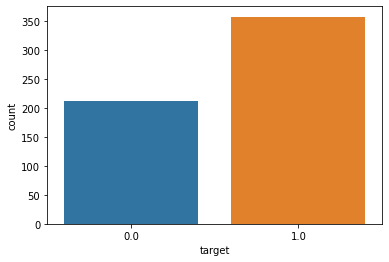

In [8]:
sns.countplot(cancer_df['target'],label='Count')

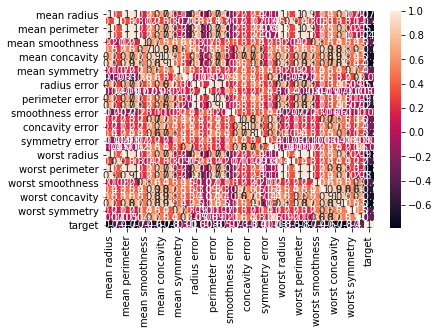

In [9]:
sns.heatmap(cancer_df.corr(),annot=True,fmt='.1g')

In [6]:
# 4.Test train split
X=cancer_df.drop(['target'], axis=1)
y=cancer_df['target']

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [8]:
# 5. Model
svc_model=SVC(random_state=0)

In [9]:
svc_model.fit(X_train,y_train)

SVC(random_state=0)

In [10]:
# 6. Testing
y_predict=svc_model.predict(X_test)

In [11]:
cm=confusion_matrix(y_test,y_predict)

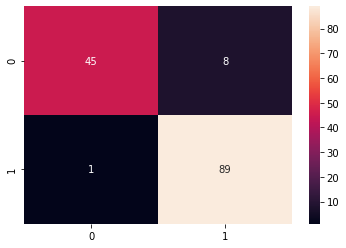

In [12]:
sns.heatmap(cm,annot=True)

In [13]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91        53
         1.0       0.92      0.99      0.95        90

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [17]:
y_predict=log_reg.predict(X_test)

In [18]:
cm=confusion_matrix(y_test, y_predict)

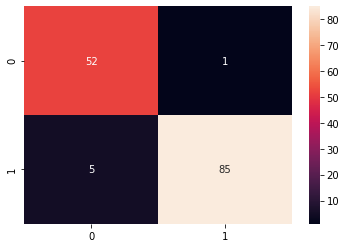

In [19]:
sns.heatmap(cm,annot=True)

In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        53
         1.0       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

